# Data Preparation

In [1]:
import acquire

In [2]:
df = acquire.get_titanic_data()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
passenger_id    891 non-null int64
survived        891 non-null int64
pclass          891 non-null int64
sex             891 non-null object
age             714 non-null float64
sibsp           891 non-null int64
parch           891 non-null int64
fare            891 non-null float64
embarked        889 non-null object
class           891 non-null object
deck            203 non-null object
embark_town     889 non-null object
alone           891 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [4]:
df.shape

(891, 13)

In [5]:
df.sample(10)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
265,265,0,2,male,36.00,0,0,10.5000,S,Second,None,Southampton,1
519,519,0,3,male,32.00,0,0,7.8958,S,Third,None,Southampton,1
589,589,0,3,male,NaN,0,0,8.0500,S,Third,None,Southampton,1
448,448,1,3,female,5.00,2,1,19.2583,C,Third,None,Cherbourg,0
831,831,1,2,male,0.83,1,1,18.7500,S,Second,None,Southampton,0
699,699,0,3,male,42.00,0,0,7.6500,S,Third,F,Southampton,1
411,411,0,3,male,NaN,0,0,6.8583,Q,Third,None,Queenstown,1
122,122,0,2,male,32.50,1,0,30.0708,C,Second,None,Cherbourg,0
802,802,1,1,male,11.00,1,2,120.0000,S,First,B,Southampton,0
297,297,0,1,female,2.00,1,2,151.5500,S,First,C,Southampton,0


In [6]:
df.describe()

,passenger_id,survived,pclass,age,sibsp,parch,fare,alone
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,445.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.602694
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.489615
min,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,445.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,667.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,890.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [7]:
df.select_dtypes('object').head(10)

,sex,embarked,class,deck,embark_town
0,male,S,Third,None,Southampton
1,female,C,First,C,Cherbourg
2,female,S,Third,None,Southampton
3,female,S,First,C,Southampton
4,male,S,Third,None,Southampton
5,male,Q,Third,None,Queenstown
6,male,S,First,E,Southampton
7,male,S,Third,None,Southampton
8,female,S,Third,None,Southampton
9,female,C,Second,None,Cherbourg


In [8]:
df.sex.value_counts()

male      577
female    314
Name: sex, dtype: int64

In [9]:
df.embark_town.value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [10]:
df.embark_town.value_counts().sum()

889

In [11]:
df.shape

(891, 13)

In [12]:
df.embark_town.value_counts(dropna=False)

Southampton    644
Cherbourg      168
Queenstown      77
NaN              2
Name: embark_town, dtype: int64

In [13]:
df.embark_town.fillna('Other').value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Other            2
Name: embark_town, dtype: int64

In [14]:
df.embark_town.fillna('Other', inplace=True)

In [15]:
df.embark_town.value_counts().sum() == df.shape[0]

True

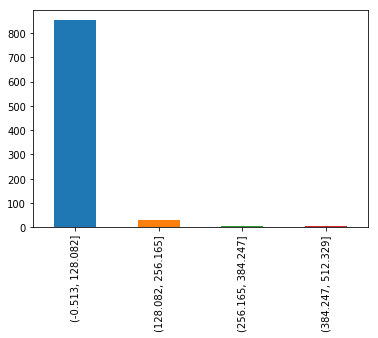

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

df.fare.value_counts(bins=4).plot.bar()

In [17]:
df.deck.value_counts(dropna=False)

NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: deck, dtype: int64

In [18]:
df.drop(columns='deck', inplace=True)

In [19]:
df.embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: embarked, dtype: int64

In [20]:
df.embarked.fillna('O', inplace=True)

In [21]:
df.embarked.value_counts()

S    644
C    168
Q     77
O      2
Name: embarked, dtype: int64

In [22]:
df.embarked

0      S
1      C
2      S
3      S
4      S
5      Q
6      S
7      S
8      S
9      C
10     S
11     S
12     S
13     S
14     S
15     S
16     Q
17     S
18     S
19     C
20     S
21     S
22     Q
23     S
24     S
25     S
26     C
27     S
28     Q
29     S
      ..
861    S
862    S
863    S
864    S
865    S
866    C
867    S
868    S
869    S
870    S
871    S
872    S
873    S
874    C
875    C
876    S
877    S
878    S
879    C
880    S
881    S
882    S
883    S
884    S
885    Q
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 891, dtype: object

In [23]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(df.embarked)

LabelEncoder()

In [24]:
df.embarked = encoder.transform(df.embarked)

In [25]:
df.embarked

0      3
1      0
2      3
3      3
4      3
5      2
6      3
7      3
8      3
9      0
10     3
11     3
12     3
13     3
14     3
15     3
16     2
17     3
18     3
19     0
20     3
21     3
22     2
23     3
24     3
25     3
26     0
27     3
28     2
29     3
      ..
861    3
862    3
863    3
864    3
865    3
866    0
867    3
868    3
869    3
870    3
871    3
872    3
873    3
874    0
875    0
876    3
877    3
878    3
879    0
880    3
881    3
882    3
883    3
884    3
885    2
886    3
887    3
888    3
889    0
890    2
Name: embarked, Length: 891, dtype: int64

In [26]:
df.describe()

,passenger_id,survived,pclass,age,sibsp,parch,fare,embarked,alone
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,445.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,2.343434,0.602694
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.167398,0.489615
min,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,222.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,2.000000,0.000000
50%,445.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,3.000000,1.000000
75%,667.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,3.000000,1.000000
max,890.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,3.000000,1.000000


In [27]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df)

In [28]:
# # find the parameters for the scaling from the training data set, then apply to the test data set

# fare_min = train.fare.min()
# fare_max = train.fare.max()

# # scale the training data
# train.fare = (train.fare - fare_min) / (fare_max - fare_min)

# # scale the test data
# test.fare = (test.fare - fare_min) / (fare_max - fare_min)

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train[['fare', 'age']])

train[['fare', 'age']] = scaler.transform(train[['fare', 'age']])
test[['fare', 'age']] = scaler.transform(test[['fare', 'age']])

/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

In [30]:
def handle_missing_values(df):
    return df.assign(
        embark_town=df.embark_town.fillna('Other'),
        embarked=df.embarked.fillna('O')
    )

def drop_columns(df):
    return df.drop(columns='deck')

def encode_embarked(df):
    encoder = LabelEncoder()
    encoder.fit(df.embarked)
    return df.assign(embarked=encoder.transform(df.embarked))

def prep_titanic_data(df):
    return df.pipe(handle_missing_values)\
        .pipe(drop_columns)\
        .pipe(encode_embarked)

# train, test = train_test_split(df)

# scaler = MinMaxScaler()
# scaler.fit(train[['fare', 'age']])

# train[['fare', 'age']] = scaler.transform(train[['fare', 'age']])
# test[['fare', 'age']] = scaler.transform(test[['fare', 'age']])


In [31]:
from acquire import get_titanic_data

prep_titanic_data(get_titanic_data())

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,3,Third,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,0,First,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,3,Third,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,3,First,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,3,Third,Southampton,1
5,5,0,3,male,NaN,0,0,8.4583,2,Third,Queenstown,1
6,6,0,1,male,54.0,0,0,51.8625,3,First,Southampton,1
7,7,0,3,male,2.0,3,1,21.0750,3,Third,Southampton,0
8,8,1,3,female,27.0,0,2,11.1333,3,Third,Southampton,0
9,9,1,2,female,14.0,1,0,30.0708,0,Second,Cherbourg,0
